# Week 6 Homework

---

## Q1: Let's start having some *real* fun...

We previously considered the normal-gamma specification 

$$\scriptsize
\begin{align*}
p(\theta,\tau|x) &\propto{} p(\theta,\tau,x) = p(x|\theta)p(\theta)p(\tau) \quad (\theta \perp\!\!\perp \tau) \leftarrow \text{independent priors} & p(\theta|x,\theta_0,\tau_0, \tau) &={} \text{N}\left(\frac{\left(\tau_0 \theta_0+\tau\sum_{i=1}^{n}x_{i}\right)}{(\tau_0+n\tau)}, \sigma^{-2}=\tau_0+n\tau \right)\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \tau^{\alpha -1}e^{-\beta \tau} & p(\tau|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\frac{\alpha}{2}+\frac{n}{2}, \frac{\beta}{2}+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)\\{}\\
\end{align*}$$

How about instead we consider a "[location-scale-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Location-scale_t-distribution)-norm-halfnorm-discrete-uniform" specification?

$$\large
\overset{x_i\; \sim\; \text{location-scale-t}(\mu, \sigma^2, \nu)}{\quad\quad\quad p(x|\mu,\sigma^2, \nu)} = {\prod_{i=1}^n
\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \sqrt{\pi \nu \sigma^2}}\left(1+\frac{1}{\nu} \frac{(x_i-\mu)^2}{\sigma^2}\right)^{-(\nu+1) / 2}}$$

$$\scriptsize 
\begin{align}
p(\mu | \mu_0, \tau_0) &={} \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}\left(\mu-\mu_0\right)^2} & p(\sigma^2 | \sigma_0^2) &={} \sqrt{\frac{2}{\pi\sigma_0^2}} \exp \left(-\frac{(\sigma^2)^2}{2 \sigma_0^2}\right) 1_{[0,\infty]}(\sigma^2) & p(\nu=i) &={} \Bigg\{ \begin{array}{cl} \frac{1}{100} & \text{for }i=1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
& \textrm{normal} && \textrm{half-normal} && \textrm{discrete uniform}
\end{align}
$$

Um yeah we're gonna need a Metroposlis cleanup on aisles one two and three  
(or a slice or adapative squeeze rejection sampling steps... in place of Metroposlis steps)

*Implement the a Metroposlis within Gibbs algorithm to sample from the posterior of the above specification. Use a "smallish" sample size, say $n=100$ and implement your acceptance probability on a log-scale.


In [7]:
import numpy as np
from scipy.stats import t, gamma, norm
import matplotlib.pyplot as plt

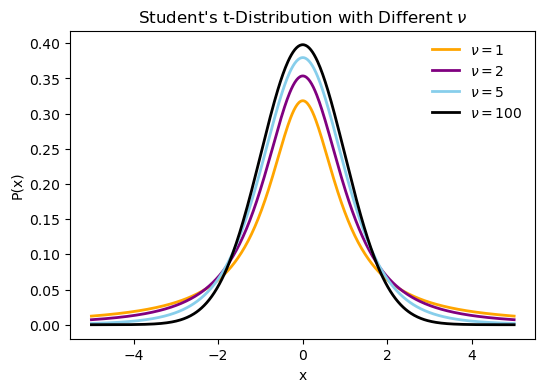

In [8]:
x = np.linspace(-5, 5, 500)

df_values = [1, 2, 5, 100]
colors = ['orange', 'purple', 'skyblue', 'black']
labels = [r'$\nu=1$', r'$\nu=2$', r'$\nu=5$', r'$\nu=100$']

fig, ax = plt.subplots(figsize=(6, 4))

for df, color, label in zip(df_values, colors, labels):
    ax.plot(x, t.pdf(x, df), label=label, color=color, linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel(r'P(x)')
ax.set_title(r"Student's t-Distribution with Different $\nu$")

ax.spines['bottom'].set_position(('outward', 0))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

ax.legend(frameon=False, loc='upper right')

plt.show()

**By Bayes' theorem**:


$$ \large
\begin{align*} 
p(\mu | x, \sigma^2, \nu) &\propto p(x | \mu, \sigma^2, \nu) p(\mu) \\
%
&= \left( \prod_{i=1}^{n} \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \sqrt{\pi \nu \sigma^2}} 
\left( 1 + \frac{(x_i - \mu)^2}{\nu \sigma^2} \right)^{-\frac{\nu+1}{2}} \right) 
\cdot \exp \left(-\frac{\tau_0}{2} (\mu - \mu_0)^2 \right) \\
%
&\propto \prod_{i=1}^{n} \left( 1 + \frac{(x_i - \mu)^2}{\nu \sigma^2} \right)^{-\frac{\nu+1}{2}} 
\cdot \exp \left(-\frac{\tau_0}{2} (\mu - \mu_0)^2 \right).
\end{align*}
$$


$$ \large
\begin{align*} 
p(\sigma^2 | x, \mu, \nu) &\propto p(x | \mu, \sigma^2, \nu) p(\sigma^2 | \sigma_0) \\
%
&= \left( \prod_{i=1}^{n} \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \sqrt{\pi \nu \sigma^2}} 
\left( 1 + \frac{(x_i - \mu)^2}{\nu \sigma^2} \right)^{-\frac{\nu+1}{2}} \right) 
\cdot \exp \left(-\frac{\sigma^2}{2\sigma_0^2} \right) \\
%
&\propto \left( \frac{1}{\sigma^2} \right)^{n/2} 
\prod_{i=1}^{n} \left( 1 + \frac{(x_i - \mu)^2}{\nu \sigma^2} \right)^{-\frac{\nu+1}{2}} 
\cdot \exp \left(-\frac{\sigma^2}{2\sigma_0^2} \right) \\
%
&= \exp \left( -\frac{\sigma^2}{2\sigma_0^2} \right) 
(\sigma^2)^{-n/2} 
\prod_{i=1}^{n} \left( 1 + \frac{(x_i - \mu)^2}{\nu \sigma^2} \right)^{-\frac{\nu+1}{2}}.
\end{align*}
$$





In [41]:
def conditional_sigma2_posterior(sigma2, x, mu, nu, sigma_0):
    """Unnormalized posterior for sigma^2 """
    if sigma2 <= 0:
        return 0  # Ensure support is only for sigma^2 > 0

    prior = np.exp(-sigma2 / (2 * sigma_0**2))
    likelihood = np.prod((1 + ((x - mu) ** 2) / (nu * sigma2)) ** (-(nu + 1) / 2))

    return prior * likelihood  # Unnormalized posterior

def slice_sampling_sigma2(x, mu, nu, sigma_0, sigma2_init=1.0, m=100, stepsize=0.5):
    """Slice sampler for sigma^2."""
    def slice_f_at_y(f, x, y, stepsize):
        """Finds a new sample using slice sampling given a horizontal slice height y."""
        a, b = max(x - stepsize, 1e-5), x + stepsize  # Ensure positive sigma^2
        
        while f(a) > y:
            a = max(a - stepsize, 1e-5)  # Keep a > 0
        while f(b) > y:
            b += stepsize

        while True:
            x_new = np.random.uniform(a, b)
            if f(x_new) > y:
                return x_new
            elif x_new < x:
                a = x_new
            else:
                b = x_new

    sigma2_samples = np.zeros(m)
    sigma2_samples[0] = sigma2_init

    for t in range(1, m):
        f_val = lambda s: conditional_sigma2_posterior(s, x, mu, nu, sigma_0)
        y_slice = np.random.uniform(0, f_val(sigma2_samples[t - 1]))  # Slice height
        sigma2_samples[t] = slice_f_at_y(f_val, sigma2_samples[t - 1], y_slice, stepsize)

    return sigma2_samples

In [53]:
np.random.seed(30)

n = 100
true_mu = 10
true_sigma2 = 1.5
true_nu = 10
x = t.rvs(df=true_nu, loc=true_mu, scale=np.sqrt(true_sigma2), size=n)

# Hyperparameters for priors
mu_0 = 5       # Prior mean for mu
tau_0 = 0.25      # Precision for mu prior
sigma_0 = 1    # Scale for half-normal prior on sigma^2

# Initial values
mu = np.mean(x)
sigma2 = np.var(x)
nu = int(np.round(np.var(x) / np.mean(x)))
nu = max(1, min(nu, 100))  # Ensure valid range

m = 11000
burn_in = 1000

mu_samples = np.zeros(m)
sigma2_samples = np.zeros(m)
nu_samples = np.zeros(m)

step_size = 5
acceptance_count = 0  # acceptance for nu
burnin_acceptance_count = 0

# Gibbs Sampling
for i in range(m):
    # Step 1: Metropolis-Hastings for mu
    mu_proposed = np.random.normal(mu, step_size)
    
    likelihood_current = np.prod((1 + (x - mu)**2 / (nu * sigma2))**(-(nu + 1) / 2))
    likelihood_proposed = np.prod((1 + (x - mu_proposed)**2 / (nu * sigma2))**(-(nu + 1) / 2))
    
    prior_current = norm.pdf(mu, mu_0, np.sqrt(1/tau_0))
    prior_proposed = norm.pdf(mu_proposed, mu_0, np.sqrt(1/tau_0))
    
    acceptance_ratio = (likelihood_proposed * prior_proposed) / (likelihood_current * prior_current)
    if np.random.uniform() < min(1, acceptance_ratio):
        mu = mu_proposed  # Accept proposal
    
    mu_samples[i] = mu

    # Step 2: Slice Sampling for sigma^2
    sigma2 = slice_sampling_sigma2(x, mu, nu, sigma_0, sigma2_init=sigma2, m=1, stepsize=0.5)[-1]
    sigma2_samples[i] = sigma2

    # Step 3: Metropolis-Hastings for nu
    nu_proposed = int(np.round(np.random.normal(nu, step_size)))
    
    # Ensure valid range without bias at edges
    while nu_proposed < 1 or nu_proposed > 100:
        nu_proposed = int(np.round(np.random.normal(nu, step_size)))

    # Compute posterior probability ratio
    log_likelihood_current = np.sum(t.logpdf(x, df=nu, loc=mu, scale=np.sqrt(sigma2)))
    log_likelihood_proposed = np.sum(t.logpdf(x, df=nu_proposed, loc=mu, scale=np.sqrt(sigma2)))

    log_acceptance_ratio = log_likelihood_proposed - log_likelihood_current

    # Accept/reject step using log scale
    if np.log(np.random.uniform()) < log_acceptance_ratio:
        nu = nu_proposed
        acceptance_count += 1
        if i < burn_in:
            burnin_acceptance_count += 1

    nu_samples[i] = nu
    
post_burnin_acceptance_count = acceptance_count - burnin_acceptance_count
total_post_burnin_iterations = m - burn_in
post_burnin_acceptance_count = max(0, post_burnin_acceptance_count)
acceptance_rate = post_burnin_acceptance_count / total_post_burnin_iterations

# Remove burn-in
mu_samples = mu_samples[burn_in:]
sigma2_samples = sigma2_samples[burn_in:]
nu_samples = nu_samples[burn_in:]

# Print summary
print(f"Posterior Mean of mu: {np.mean(mu_samples):.3f}")
print(f"Posterior Mean of sigma^2: {np.mean(sigma2_samples):.3f}")
print(f"Posterior Mode of nu: {max(set(nu_samples), key=list(nu_samples).count)}")


Posterior Mean of mu: 9.740
Posterior Mean of sigma^2: 1.439
Posterior Mode of nu: 43.0


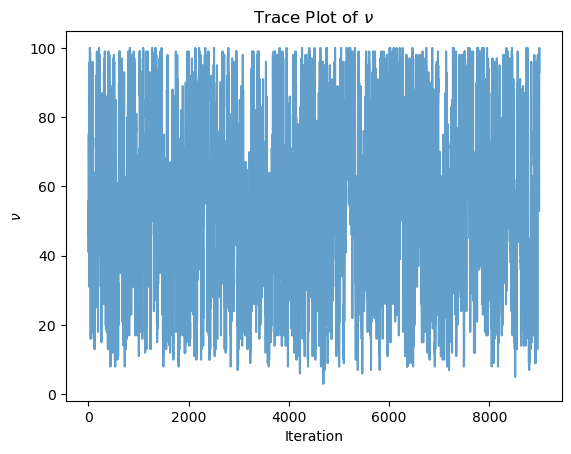

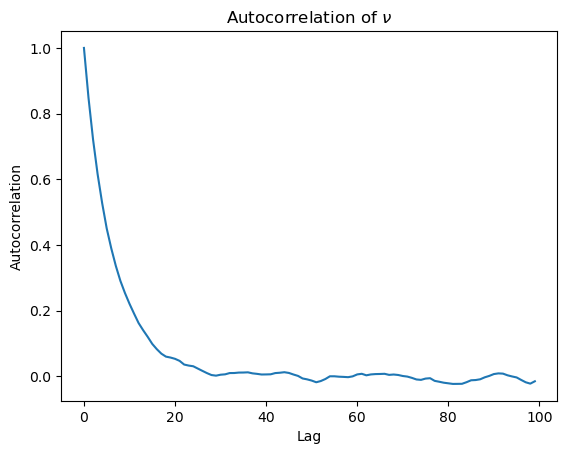

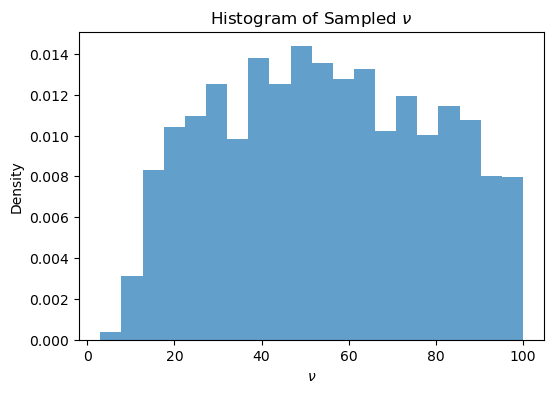

In [45]:

plt.plot(nu_samples[burn_in:], alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel(r"$\nu$")
plt.title("Trace Plot of $\\nu$")
plt.show()

K = 100
autocorrelations = np.ones(K)
for t_plus_k in range(1, K):
    autocorrelations[t_plus_k] = np.corrcoef(nu_samples[:-t_plus_k], nu_samples[t_plus_k:])[0,1]
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title(f"Autocorrelation of $\\nu$")
plt.plot(autocorrelations)

plt.figure(figsize=(6, 4))
plt.hist(nu_samples[burn_in:], bins=20, alpha=0.7, density=True)
plt.xlabel(r"$\nu$")
plt.ylabel("Density")
plt.title("Histogram of Sampled $\\nu$")
plt.show()



While the trace plot indicates reasonable mixing and that the autocorrelation dips down quickly, the posterior of $\nu$ is quite diffuse and spread across a wide range, with a mode much higher than the true value. This is largely due to the uninformative prior we have chosen and the relatively small sample size of 100, which limits the ability of the likelihood to exert enough influence on the posterior. Also, in our case, the true $\nu$ is moderately heavy-tailed but not extreme. So the data does not contain many extreme outliers that would force the sampler to settle on small $\nu$'s, nor is it perfectly normal-looking where the likelihood would push $\nu$ towards larger values. Because of this ambiguity, the posterior will not strongly favor a particular value, leading to a wide range of plausible values. In contrast, the posterior estimates for $\mu$ and $\sigma^2$ perform well, which means they are well identified with the given more informative priors and the sample size.

## Q2: explore the role of sample size in providing inference for the degrees of freedom parameter $\nu$

*Implement the specification above using `PyMC` where you can explore inference on $\nu$ at different sample sizes. Provide a summarization and explanation of your findings.*



In [13]:
import arviz as az
import pymc

In [112]:
n = 100
true_mu, true_sigma2, true_nu = 10, 3, 10
sample_sizes = [50, 500, 1000, 5000, 10000]
samples = {}
posterior_results = {}

student_t = t(df=true_nu, loc=true_mu, scale=np.sqrt(true_sigma2))
for n in sample_sizes:
    samples[n] = student_t.rvs(size=n)

m = 10000

In [113]:
for n in sample_sizes:
#     print(f"Inference for sample size {n}")
    x = samples[n]
    with pymc.Model() as model:
        nu = pymc.DiscreteUniform("nu", lower=1, upper=100)
        mu = pymc.Normal("mu", mu=5, sigma=10)
        sigma2 = pymc.HalfNormal("sigma2", sigma=10) 
        likelihood = pymc.StudentT("obs", nu=nu, mu=mu, sigma=pymc.math.sqrt(sigma2), observed=x)
        idata = pymc.sample(m, chains = 2, tune=1000, return_inferencedata=True)
        posterior_results[n] = idata

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [nu]
>NUTS: [mu, sigma2]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [nu]
>NUTS: [mu, sigma2]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [nu]
>NUTS: [mu, sigma2]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [nu]
>NUTS: [mu, sigma2]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 14 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [nu]
>NUTS: [mu, sigma2]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 18 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



=== Inference and Diagnostics for Sample Size 50 ===



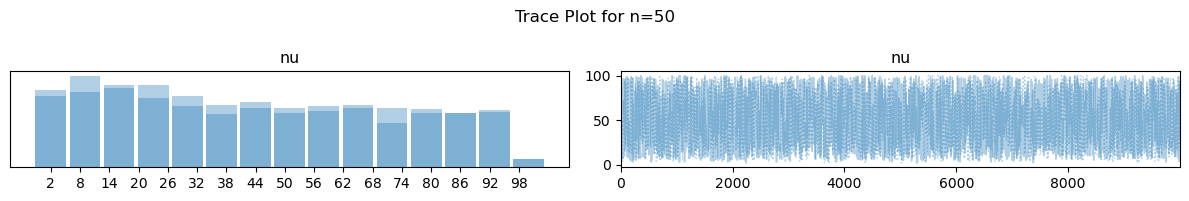

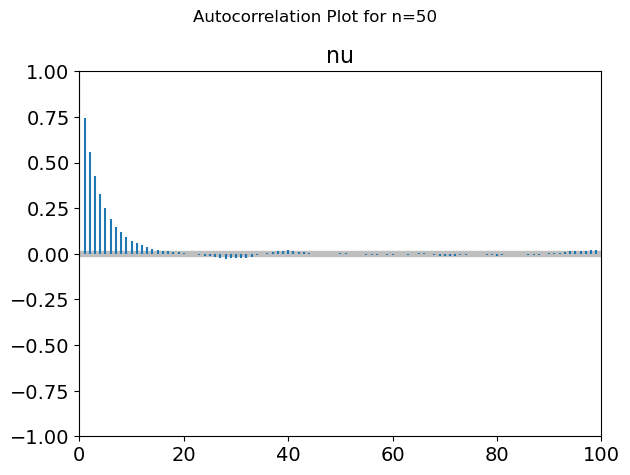

Posterior summary (50):
      mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
nu  47.205  28.794       3.0       95.0       0.55    0.389    2531.0   

    ess_tail  r_hat  
nu    1808.0    1.0  

=== Inference and Diagnostics for Sample Size 500 ===



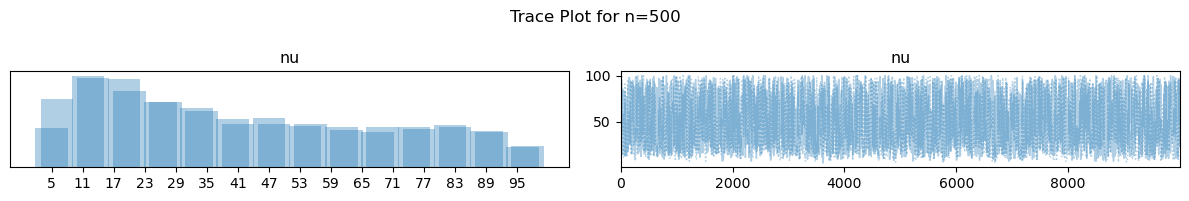

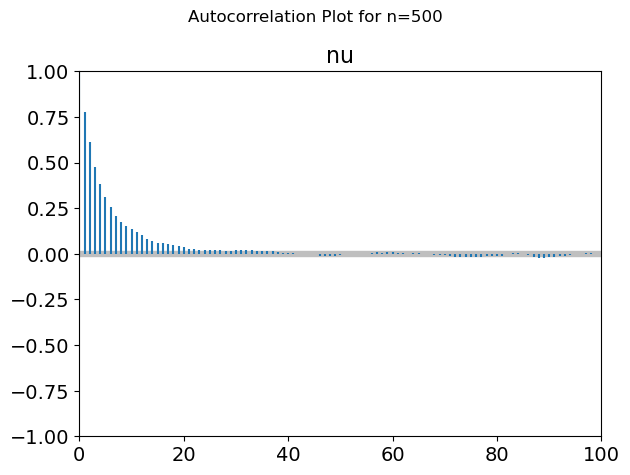

Posterior summary (500):
     mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
nu  45.43  27.067       8.0       94.0      0.605    0.428    1750.0   

    ess_tail  r_hat  
nu    1741.0    1.0  

=== Inference and Diagnostics for Sample Size 1000 ===



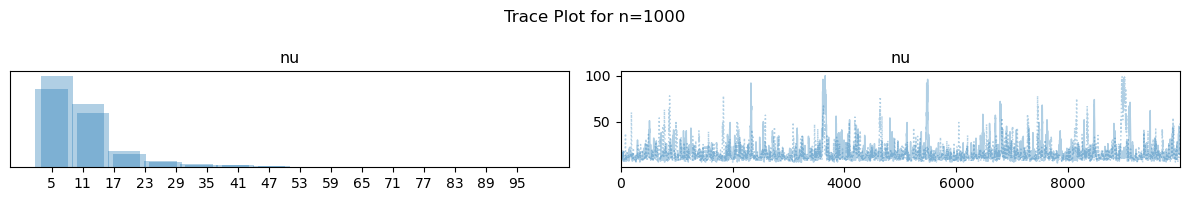

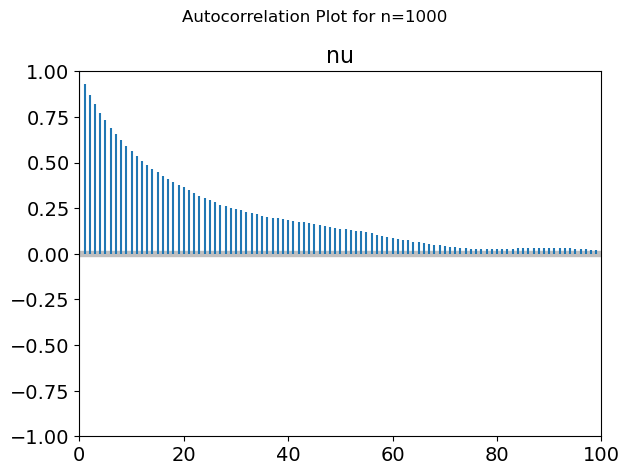

Posterior summary (1000):
      mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
nu  14.992  10.323       6.0       33.0      0.478    0.369     797.0   

    ess_tail  r_hat  
nu     773.0    1.0  

=== Inference and Diagnostics for Sample Size 5000 ===



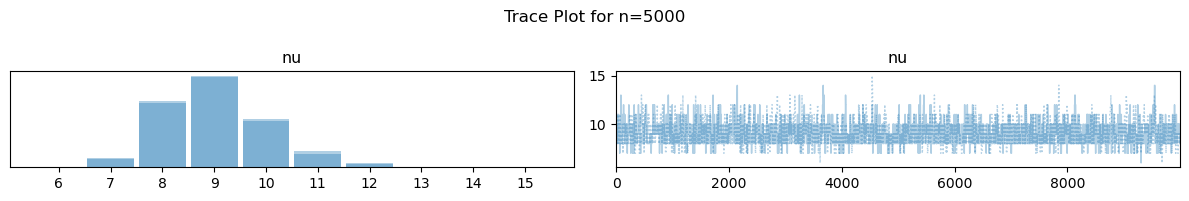

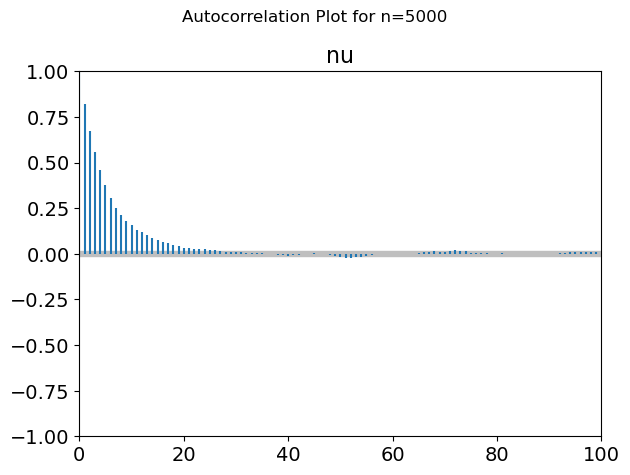

Posterior summary (5000):
     mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  9.042  1.057       7.0       11.0      0.025    0.017    1839.0    2023.0   

    r_hat  
nu    1.0  

=== Inference and Diagnostics for Sample Size 10000 ===



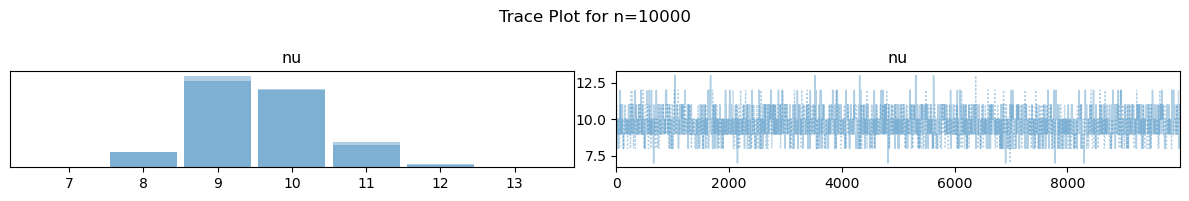

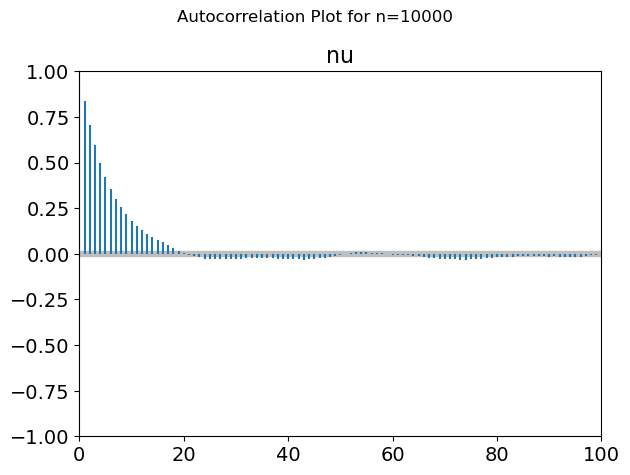

Posterior summary (10000):
     mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  9.572  0.847       8.0       11.0       0.02    0.014    1779.0    1976.0   

    r_hat  
nu    1.0  


In [114]:
for n in sample_sizes:
    print(f"\n=== Inference and Diagnostics for Sample Size {n} ===\n")

    az.plot_trace(posterior_results[n]["posterior"], var_names=["nu"])
    plt.suptitle(f"Trace Plot for n={n}")
    plt.tight_layout()
    plt.show()

    az.plot_autocorr(posterior_results[n]["posterior"], var_names=["nu"], max_lag=100, combined=True)
    plt.suptitle(f"Autocorrelation Plot for n={n}")
    plt.tight_layout()
    plt.show()

    print(f"Posterior summary ({n}):")
    print(az.summary(posterior_results[n], var_names=["nu"], hdi_prob=0.95))
    

As sample size increases, the posterior distribution of $\nu$ becomes more concentrated around the true value of 10, demonstrating the increasing influence of the likelihood over the prior. For smaller sample sizes (n=50,100,500), the posterior distribution is much more dispersed, indicating high uncertainty in estimating. The trace plots indicate relatively good mixing, and the standard deviation of the posterior decreases, confirming the expected convergence as more data is incorporated.

The ESS is relatively low across all cases, which is expected given that $\nu$ is discrete and sampled using a "Metropolis step within NUTS". The trend of ESS first decreasing and then increasing suggests that, at moderate sample sizes, the likelihood starts dominating, but the discrete nature still possibly limits efficient proposal acceptance. However, as $n$ continues to increase, the posterior becomes more concentrated around the true value, leading to improved mixing and slightly higher ESS.

## Q3: the posterior predictive distribution does something like the following...

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\tau_i)$ be $\textrm{N}(y_i | 0,\tau_i)$ and now integrate out the uncertainty in $\tau_i$ and see what distribution is left over for $y_i$.

*Go look at the gamma distribution and remember that you know that the integrals of unnormalized densities are the inverse of their normalizing constants. Then go look at the t distribution and determine what distribution the following expression defines. Then explain why the behavior demonstrated here is analagous to that of the posterior predictive distribution.*

$$\int p(y_i|\tau_i) p(\tau_i)  d\tau_i = \int \sqrt{\frac{\tau_i}{2\pi}}e^{-\frac{1}{2}\tau_i y_i^2} \frac {\frac{\nu}{2}^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu}{2}-1}e^{-\frac{\nu}{2}\tau_i} d\tau_i$$



**Derivation**:

$$ \large
\begin{align*}
p(y_i) & = \int^{\infty}_{0}p(y_i, \tau_i) d\tau_i = \int p(y_i|\tau_i) p(\tau_i)  d\tau_i \\
& = \int^{\infty}_{0} \sqrt{\frac{\tau_i}{2\pi}} e^{-\frac{1}{2}\tau_i y_i^2} \cdot \frac{(\frac{\nu}{2})^\frac{\nu}{2}}{\Gamma(\frac{\nu}{2})} \tau_i^{\frac{\nu}{2} - 1} e^{-\frac{\nu}{2}\tau_i} d\tau_i \\
& = \frac{(\frac{\nu}{2})^{\frac{\nu}{2}}}{\Gamma(\frac{\nu}{2})} \cdot \frac{1}{\sqrt{2\pi}} \int_{0}^{\infty} \tau_i^{\frac{\nu}{2} - \frac{1}{2}} e^{-\tau_i \left( \frac{y_i^2}{2} + \frac{\nu}{2} \right)} d\tau_i
\end{align*}
$$

<br/>

Recognizing the integral is a Gamma integral, $\int_{0}^{\infty} x^{a-1} e^{-bx} dx = \frac{\Gamma(a)}{b^a},$ 

where $a = \frac{\nu}{2} + \frac{1}{2} = \frac{\nu + 1}{2}, b = \frac{y_i^2}{2} + \frac{\nu}{2} = \frac{\nu + y_i^2}{2}$, 
we have $$ \large
\begin{align*} 
p(y_i) & = \frac{\left(\frac{\nu}{2}\right)^{\frac{\nu}{2}}}{\Gamma(\frac{\nu}{2})} \cdot \frac{1}{\sqrt{2\pi}} \cdot \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\left(\frac{\nu + y_i^2}{2}\right)^{(\nu + 1)/2}} \\
& = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\pi \nu} \Gamma(\frac{\nu}{2})} \left( 1 + \frac{y_i^2}{\nu} \right)^{-\frac{\nu + 1}{2}}
\end{align*}$$

Looking back at Q1, this is just the Student's t-distribution ($\mu = 0, \sigma^2=1$) with $\nu$ degress of freedom, $y_i \sim t_\nu$.

That says, for a normal likelihood with a gamma-distributed precision $\tau_i$ (inverse-gamma prior for variance), the posterior predictive distribution follows a Student's t-distribution. Gamma prior on precision induces extra variation, so marginalizing over $\tau_i$ introduces additional uncertainty, leading to heavier tails than the normal distribution. In other words, the Bayesian predictive model has naturally incorporated uncertainty in the variance.